In [40]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups  # get data from sklearn
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd
import pprint

In [27]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [42]:
newsgroups = fetch_20newsgroups()
pprint.pprint(list(newsgroups.target_names)) # all group names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


### This dataset includes 18,000 newsgroups posts with 20 topics.

In [44]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [45]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [70]:
print("\n".join(newsgroups_train.data[:2]))


Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


In [9]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:10]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space', 'alt.atheism',
       'sci.space', 'alt.atheism', 'sci.space', 'comp.graphics',
       'sci.space', 'comp.graphics'], dtype='<U18')

In [75]:
newsgroups_train.target_names[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [11]:
num_topics, num_top_words = 6, 8

### Stop words, stemming, lemmatization Scikit-learn

In [12]:
from sklearn.feature_extraction import stop_words
# from sklearn.feature_extraction.text import stop_words

stop_words_sklearn = sorted(list(stop_words.ENGLISH_STOP_WORDS))
# print(stop_words_sklearn)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk import stem

In [15]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [16]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [17]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [18]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [19]:
fly_list = ['fly', 'flies', 'flying']
org_list = ['organize', 'organizes', 'organizing']
un_list = ['universe', 'university']

In [20]:
[wnl.lemmatize(word) for word in [fly_list, org_list, un_list][2]]

['universe', 'university']

In [21]:
[porter.stem(word) for word in [fly_list, org_list, un_list][1]]

['organ', 'organ', 'organ']

### Spacy

In [22]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [84]:
# from spacy.lemmatizer import Lemmatizer, NOUN
# lemmatizer = nlp.vocab.morphology.lemmatizer
# [lemmatizer.lookup(word) for word in [fly_list, org_list, un_list][2]]

In [85]:
# stop_words_spacy = sorted(list(nlp.Defaults.stop_words)) #[:10]
# print(stop_words_spacy)

In [86]:
# sklearn but not spacy
# list_difference = []
# for item in stop_words_sklearn:
#   if item not in stop_words_spacy:
#     list_difference.append(item)
# print(list_difference)

In [87]:
#spacy not sklearn
# list_difference = []
# for item in stop_words_spacy:
#   if item not in stop_words_sklearn:
#     list_difference.append(item)
# print(list_difference)

In [88]:
# len(nlp.Defaults.stop_words - stop_words.ENGLISH_STOP_WORDS)

### Data processing

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [115]:
import nltk

In [116]:
vectorizer = CountVectorizer(stop_words='english')

In [117]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()  # todense jest potrzebne dla SVD i NMF, nie może być sparse
vectors.shape 

(2034, 26576)

In [118]:
vocab = np.array(vectorizer.get_feature_names())
vocab[20000:20020]

array(['rectangle', 'rectangular', 'rectification', 'rectified',
       'rectify', 'recurrant', 'recurse', 'recursive', 'recursively',
       'recursiveness', 'recycled', 'red', 'reddish', 'reddy', 'redeemed',
       'redefine', 'redefinition', 'redefinitions', 'redelfs',
       'redemption'], dtype='<U80')

In [119]:
vocab.shape

(26576,)

##### Rozkład według wartości osobliwych (dekompozycja głównych składowych,(SVD – z ang. Singular Value Decomposition))
– pewien rozkład macierzy (dekompozycja) na iloczyn trzech specyficznych macierzy.

### Singular Value Decomposition (SVD)

In [120]:
import numpy as np
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 10.8 s


In [134]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [123]:
s[:6]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043,
       182.74475229, 168.15235371])

In [124]:
# np.diag(s[:4])

In [125]:
# np.diag(np.diag(s[:4]))

In [40]:
#Exercise: confrim that U, s, Vh is a decomposition of `vectors`

In [128]:
reconstructed_vectors = U @ np.diag(s) @ Vh 
np.linalg.norm(reconstructed_vectors - vectors)
np.allclose(reconstructed_vectors, vectors)

True

In [44]:
#Exercise: Confirm that U, Vh are orthonormal


In [136]:
# np.allclose(U.T @ U, np.eye(U.shape[0])) # np.eye() return a 2-D array with ones on the diagonal and zeros elsewhere.
# np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

#### topic

In [140]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [141]:
show_topics(Vh[:6])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true']

### Non-negative Matrix Factorization (NMF)

In [59]:
m,n=vectors.shape
d=5  # num topics

In [60]:

clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [61]:
show_topics(H1)

['jpeg image gif file color images format quality version files free bit',
 'edu graphics pub mail 128 ray ftp send 3d com server objects',
 'space launch satellite nasa commercial satellites year market data earth mission lunar',
 'jesus god people matthew atheists does atheism said just believe religious religion',
 'image data available software processing ftp edu analysis images display package user']

### TF-IDF

In [62]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [145]:
print(newsgroups_train.data[10:12])
print("**************************************************************************************************")
print("\n".join(newsgroups_train.data[10:12]))

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.", "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs th

In [64]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [65]:
show_topics(H1)

['people don think just like objective say morality know moral religion did',
 'graphics thanks files image file program windows know format ftp software help',
 'space nasa launch shuttle orbit moon lunar earth station data gov satellite',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew bob sea',
 'god jesus bible believe christian atheism does belief faith christians christ exist']

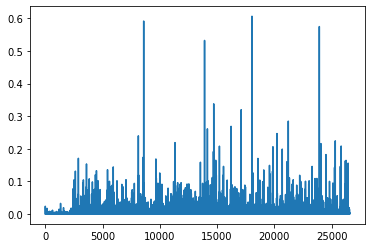

In [66]:
plt.plot(clf.components_[0])

In [67]:
clf.reconstruction_err_

43.71292605795277

### British Literature SVD & NMF in Excel

In [69]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition
from glob import glob
import os

In [70]:
np.set_printoptions(suppress=True)
#These options determine the way floating point numbers, arrays and other NumPy objects are displayed.

In [71]:
filenames = []
for folder in ["british-fiction-corpus"]: 
    filenames.extend(glob(folder + "/*.txt"))  # filenames is the list of txt files
    

In [103]:
filenames[:3]

['british-fiction-corpus\\ABronte_Agnes.txt',
 'british-fiction-corpus\\ABronte_Tenant.txt',
 'british-fiction-corpus\\Austen_Emma.txt']

In [109]:
vectorizer = TfidfVectorizer(input='filename', stop_words='english')
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

((27, 55035), 55035)

In [110]:
vocab[8000:8020]

array(['busiest', 'busily', 'business', 'businesses', 'buskin', 'buss',
       'bust', 'busting', 'bustle', 'bustled', 'bustling', 'bustlings',
       'busts', 'buswell', 'busy', 'busybodies', 'busybody', 'busying',
       'butcher', 'butchered'], dtype='<U31')

In [85]:
[f.split("\\")[1] for f in filenames]

['ABronte_Agnes.txt',
 'ABronte_Tenant.txt',
 'Austen_Emma.txt',
 'Austen_Pride.txt',
 'Austen_Sense.txt',
 'CBronte_Jane.txt',
 'CBronte_Professor.txt',
 'CBronte_Villette.txt',
 'Dickens_Bleak.txt',
 'Dickens_David.txt',
 'Dickens_Hard.txt',
 'EBronte_Wuthering.txt',
 'Eliot_Adam.txt',
 'Eliot_Middlemarch.txt',
 'Eliot_Mill.txt',
 'Fielding_Joseph.txt',
 'Fielding_Tom.txt',
 'Richardson_Clarissa.txt',
 'Richardson_Pamela.txt',
 'Sterne_Sentimental.txt',
 'Sterne_Tristram.txt',
 'Thackeray_Barry.txt',
 'Thackeray_Pendennis.txt',
 'Thackeray_Vanity.txt',
 'Trollope_Barchester.txt',
 'Trollope_Phineas.txt',
 'Trollope_Prime.txt']

#### NMF

In [86]:
clf = decomposition.NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(dtm)
H1 = clf.components_

In [87]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [88]:
def get_all_topic_words(H):
    top_indices = lambda t: {i for i in np.argsort(t)[:-num_top_words-1:-1]}
    topic_indices = [top_indices(t) for t in H]
    return sorted(set.union(*topic_indices))

In [89]:
ind = get_all_topic_words(H1)

In [90]:
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'catherine', 'cathy',
       'corporal', 'crawley', 'darcy', 'did', 'dorothea', 'earnshaw',
       'edgar', 'elinor', 'emma', 'father', 'finn', 'glegg', 'good',
       'gradgrind', 'hareton', 'heathcliff', 'jones', 'joseph', 'know',
       'lady', 'laura', 'like', 'linton', 'little', 'll', 'lopez',
       'louisa', 'lydgate', 'lyndon', 'maggie', 'man', 'marianne',
       'micawber', 'miss', 'mr', 'mrs', 'old', 'osborne', 'pendennis',
       'philip', 'phineas', 'quoth', 'said', 'sissy', 'sophia', 'sparsit',
       'stephen', 'thought', 'time', 'tis', 'toby', 'tom', 'trim',
       'tulliver', 'uncle', 'wakem', 'weston', 'wharton'], dtype='<U31')

In [91]:
show_topics(H1)

['mr said lydgate mrs dorothea micawber little know',
 'said little like did time know good thought',
 'adams jones said allworthy sophia lady joseph mr',
 'elinor mr emma darcy mrs weston marianne miss',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'toby said uncle father corporal quoth tis trim',
 'phineas said lopez mr finn man wharton laura',
 'bounderby gradgrind sparsit said mr sissy louisa stephen',
 'crawley said lyndon pendennis old little osborne lady']

In [92]:
W1.shape, H1[:, ind].shape

((27, 10), (10, 63))

#### Export to CSVs

In [99]:
from IPython.display import FileLink, FileLinks

In [100]:
np.savetxt("britlit_W.csv", W1, delimiter=",", fmt='%.14f')
FileLink('britlit_W.csv')

C:\Users\User\Intro to NLP\britlit_W.csv

In [101]:
np.savetxt("britlit_H.csv", H1[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_H.csv')

C:\Users\User\Intro to NLP\britlit_H.csv

In [102]:
np.savetxt("britlit_raw.csv", dtm[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_raw.csv')

C:\Users\User\Intro to NLP\britlit_raw.csv

#### SVD

In [93]:
U, s, V = decomposition.randomized_svd(dtm, 10)

In [94]:

ind = get_all_topic_words(V)

In [95]:
len(ind)

49

In [96]:
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'bretton', 'catherine',
       'crawley', 'crimsworth', 'darcy', 'dashwood', 'did', 'elinor',
       'elizabeth', 'elton', 'emma', 'finn', 'fleur', 'good', 'gradgrind',
       'hareton', 'heathcliff', 'hunsden', 'jennings', 'jones', 'joseph',
       'knightley', 'know', 'lady', 'linton', 'little', 'lopez', 'louisa',
       'madame', 'maggie', 'man', 'marianne', 'miss', 'monsieur', 'mr',
       'mrs', 'pelet', 'phineas', 'said', 'sissy', 'sophia', 'sparsit',
       'toby', 'tulliver', 'uncle', 'weston'], dtype='<U31')

In [97]:
show_topics(H1)

['mr said lydgate mrs dorothea micawber little know',
 'said little like did time know good thought',
 'adams jones said allworthy sophia lady joseph mr',
 'elinor mr emma darcy mrs weston marianne miss',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'toby said uncle father corporal quoth tis trim',
 'phineas said lopez mr finn man wharton laura',
 'bounderby gradgrind sparsit said mr sissy louisa stephen',
 'crawley said lyndon pendennis old little osborne lady']